In [10]:
import pandas as pd
import django
import os
from asgiref.sync import sync_to_async

In [7]:
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "Ecommerce.settings")
django.setup()

In [8]:
from shop.models import Product

In [20]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.all())

In [21]:
products = await retrieve_products_from_db()
len(products)

106

In [37]:
products[0].__dict__

{'_state': <django.db.models.base.ModelState at 0x16bf23170>,
 'id': 1,
 'name': 'Sosete ieftine',
 'slug': 'sosete-ieftine',
 'description': 'Foarte bune pentru invatat, in orice anotimp!!!',
 'price': Decimal('3.00'),
 'image': 'product_images/sosete-copii-cu-model-mingi-de-fotbal-conte-kids-tip-top-396-gri-1043-9809.webp',
 'created': datetime.datetime(2025, 5, 16, 16, 51, 19, 801000, tzinfo=datetime.timezone.utc),
 'updated': datetime.datetime(2025, 5, 16, 15, 53, 32, 475000, tzinfo=datetime.timezone.utc),
 'category_id': 1}

In [26]:
products[0].__dict__.keys()

dict_keys(['_state', 'id', 'name', 'slug', 'description', 'price', 'image', 'created', 'updated', 'category_id'])

In [27]:
filter_keys = ['name', 'slug', 'description', 'price']

In [30]:
products_list = []

for p in products:
    new_dict = { k: p.__dict__[k] for k in filter_keys }
    products_list.append(new_dict)
products_list[1]

{'name': 'Sosete scumpe',
 'slug': 'sosete-scumpe',
 'description': 'Nu este recomandat sarakilor (gluma)',
 'price': Decimal('200.00')}

In [31]:
df = pd.DataFrame(products_list)
df

,name,slug,description,price
0,Sosete ieftine,sosete-ieftine,"Foarte bune pentru invatat, in orice anotimp!!!",3.00
1,Sosete scumpe,sosete-scumpe,Nu este recomandat sarakilor (gluma),200.00
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00
3,Produsul 18,produsul-18,,18.00
4,Produsul 13,produsul-13,,13.00
...,...,...,...,...
101,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase is a masterpiece o...,12999.99
102,Rolex Datejust,rolex-datejust,The Rolex Datejust is an iconic and versatile ...,10999.99
103,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99
104,Amazon Echo Plus,amazon-echo-plus,The Amazon Echo Plus is a smart speaker with b...,99.99


In [32]:
df["price"].max()

Decimal('13999.99')

In [33]:
df["price"].describe()

count      106
unique      59
top       8.99
freq         4
Name: price, dtype: object

In [34]:
df["price"].mean()

np.float64(612.583962264151)

In [35]:
df[df["price"] == df["price"].max()]

,name,slug,description,price
103,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99


In [48]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.select_related("category").values('name', 'slug', 'description', 'price', "category__name"))

products = await retrieve_products_from_db()

In [53]:
df = pd.DataFrame(products)
df.rename(columns={"category__name":"category"})

,name,slug,description,price,category
0,Sosete ieftine,sosete-ieftine,"Foarte bune pentru invatat, in orice anotimp!!!",3.00,sosete
1,Sosete scumpe,sosete-scumpe,Nu este recomandat sarakilor (gluma),200.00,sosete
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00,None
3,Produsul 18,produsul-18,,18.00,None
4,Produsul 13,produsul-13,,13.00,None
...,...,...,...,...,...
101,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase is a masterpiece o...,12999.99,None
102,Rolex Datejust,rolex-datejust,The Rolex Datejust is an iconic and versatile ...,10999.99,None
103,Rolex Submariner Watch,rolex-submariner-watch,The Rolex Submariner is a legendary dive watch...,13999.99,None
104,Amazon Echo Plus,amazon-echo-plus,The Amazon Echo Plus is a smart speaker with b...,99.99,None


In [49]:
products[0]

{'name': 'Sosete ieftine',
 'slug': 'sosete-ieftine',
 'description': 'Foarte bune pentru invatat, in orice anotimp!!!',
 'price': Decimal('3.00'),
 'category__name': 'sosete'}

# pip install seaborn

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

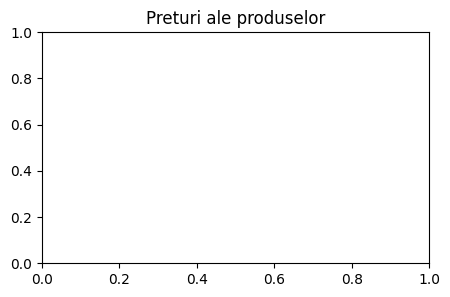

In [61]:
plt.figure(figsize=(5,3 ))
plt.title("Preturi ale produselor")
plt.show()

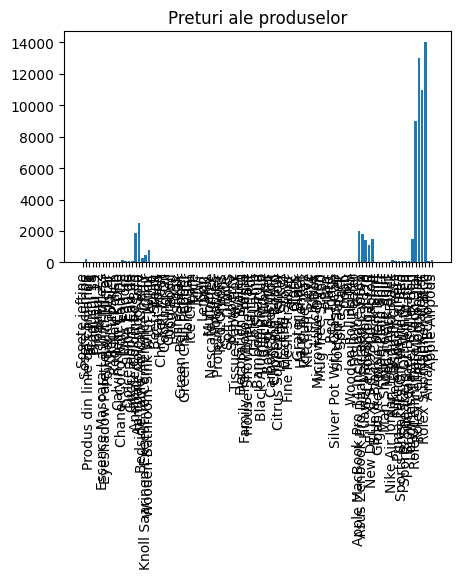

In [74]:
plt.figure(figsize=(5,3 ))
plt.bar(data=df,height=df["price"], x=df["name"])
plt.title("Preturi ale produselor")
plt.xticks(rotation=90)
plt.show()

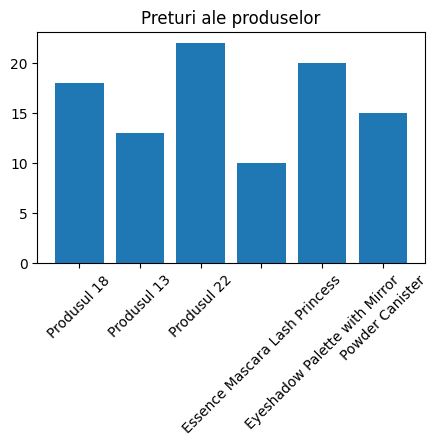

In [73]:
sliced_df = df[3:9]

plt.figure(figsize=(5,3 ))
plt.bar(data=sliced_df,height=sliced_df["price"], x=sliced_df["name"])
plt.xticks(rotation=45)
plt.title("Preturi ale produselor")
plt.show()

/var/folders/93/qw471b_96px9kvlzs8__bk480000gn/T/ipykernel_27790/966568691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sliced_df, x="name", y="price", palette="pastel")


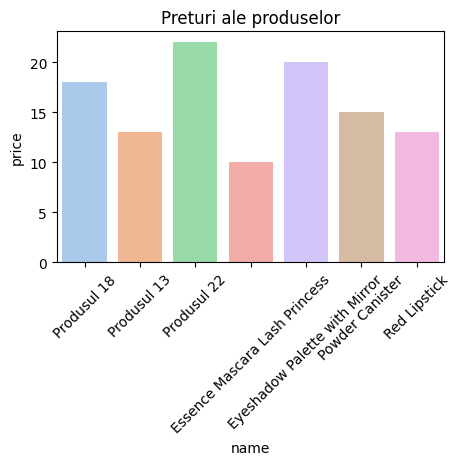

In [89]:
sliced_df = df[3:10]

plt.figure(figsize=(5,3 ))
sns.barplot(data=sliced_df, x="name", y="price", palette="pastel")
plt.xticks(rotation=45)
plt.title("Preturi ale produselor")
plt.show();

/var/folders/93/qw471b_96px9kvlzs8__bk480000gn/T/ipykernel_27790/966568691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sliced_df, x="name", y="price", palette="pastel")


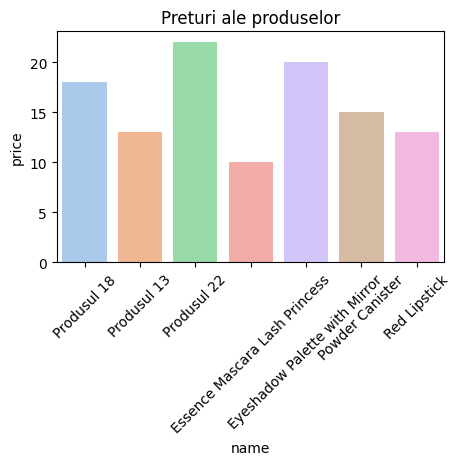

In [93]:
sliced_df = df[3:10]

plt.figure(figsize=(5,3 ))
sns.barplot(data=sliced_df, x="name", y="price", palette="pastel")
plt.xticks(rotation=45)
plt.title("Preturi ale produselor")
plt.show();

In [94]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]